In [119]:
import pandas
import scipy
import sklearn
import keras
import tensorflow

from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import GroupKFold


keras.__version__

'3.0.5'

In [120]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [121]:
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

#dataset = pandas.read_csv(folder_path + '11-03-minmax_normalised_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'usual_wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep'])

#dataset = pandas.read_csv(folder_path + 'normalised-timed-activity-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance'])

dataset = pandas.read_csv(folder_path + 'normalised-activity-survey-timed-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])


#dataset = pandas.read_csv(folder_path + 'normalised-timed-activity-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])
# split into input (X) and output (Y) variables
X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance']].values
#X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep']].values
X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values
y = dataset['ssq_score'].values


In [122]:
gkf = GroupKFold(n_splits=5)

groups = dataset['participantId'].values

In [123]:
'''l1size = 10
l2size = 5'''

l1size = 30
l2size = 15
l3size = 5

In [124]:
print(len(X), len(y))


524 524


In [125]:
train_rmse_histories = []
test_rmse_histories = []

train_mse_histories = []
test_mse_histories = []

In [126]:
import numpy as np
from sklearn.model_selection import train_test_split

unique_participants = np.unique(groups)
train_val_groups, test_groups = train_test_split(unique_participants, test_size=0.2, random_state=42) # 0.2 test
train_groups, val_groups = train_test_split(train_val_groups, test_size=0.25, random_state=42) # 0.2 val


def filter_data(groups, group_labels, X, y):
    mask = np.isin(groups, group_labels)
    return X[mask], y[mask]

X_train, y_train = filter_data(groups, train_groups, X, y)
X_val, y_val = filter_data(groups, val_groups, X, y)
X_test, y_test = filter_data(groups, test_groups, X, y)


In [127]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
import keras

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(l1size, activation='relu'))
model.add(Dense(l2size, activation='relu'))
model.add(Dense(l3size, activation='relu'))
model.add(Dense(1, activation='linear'))

optm = SGD(learning_rate=0.01, momentum=0.0)
model.compile(optimizer=optm, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_val, y_val))

predict_train = model.predict(X_train)
predict_val = model.predict(X_val)

train_rmse_history = history.history['root_mean_squared_error']
val_rmse_history = history.history['val_root_mean_squared_error']
train_mse_history = history.history['loss']
val_mse_history = history.history['val_loss']

final_test_metrics = model.evaluate(X_test, y_test, verbose=1)
final_test_mse = final_test_metrics[0]
final_test_rmse = final_test_metrics[1]

print("Final Test MSE:", final_test_mse)
print("Final Test RMSE:", final_test_rmse)


Epoch 1/400
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1049 - root_mean_squared_error: 0.3191 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2345
Epoch 2/400
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0557 - root_mean_squared_error: 0.2354 - val_loss: 0.0595 - val_root_mean_squared_error: 0.2440
Epoch 3/400
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0588 - root_mean_squared_error: 0.2404 - val_loss: 0.1011 - val_root_mean_squared_error: 0.3180
Epoch 4/400
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0533 - root_mean_squared_error: 0.2299 - val_loss: 0.0569 - val_root_mean_squared_error: 0.2386
Epoch 5/400
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0527 - root_mean_squared_error: 0.2280 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2350
Epoch 6/400
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0379 - root_mean_squared_error: 0.1940 - val_loss: 0.0588 - val_root_mean_squared_error: 0.2426
Epoch 7/400
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

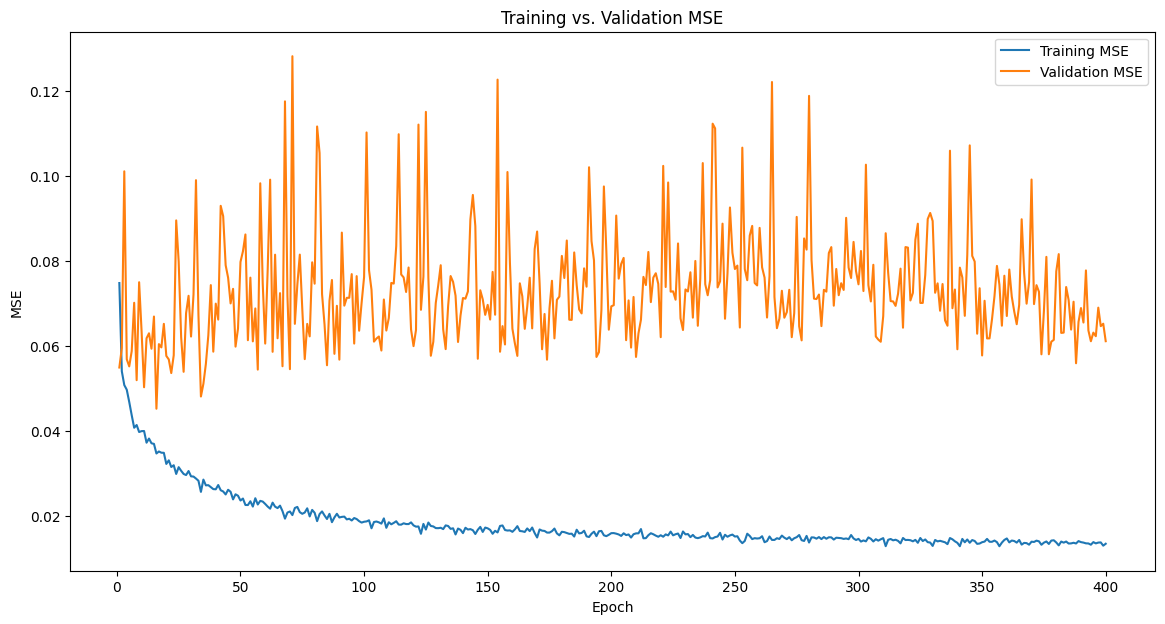

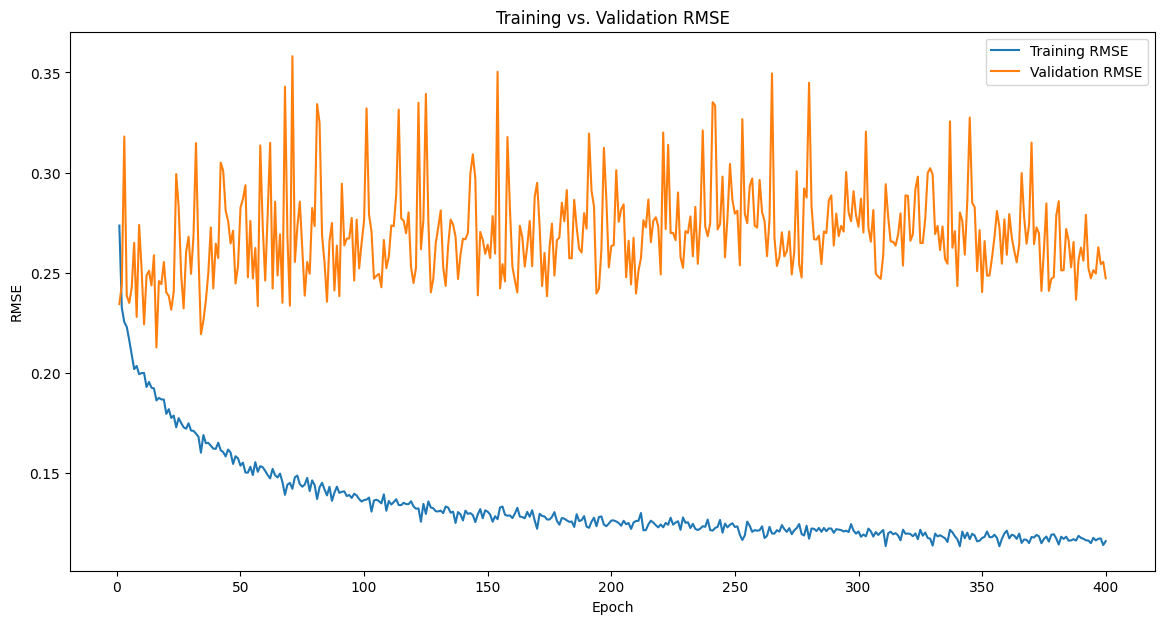

In [128]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_mse_history) + 1)

# Plotting the MSEs
plt.figure(figsize=(14, 7))
plt.plot(epochs, train_mse_history, label='Training MSE')
plt.plot(epochs, val_mse_history, label='Validation MSE')
plt.title('Training vs. Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the RMSEs
plt.figure(figsize=(14, 7))
plt.plot(epochs, train_rmse_history, label='Training RMSE')
plt.plot(epochs, val_rmse_history, label='Validation RMSE')
plt.title('Training vs. Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [129]:
# Calculate the averages of MSE and RMSE for training and validation
average_train_mse = sum(train_mse_history) / len(train_mse_history)
average_test_mse = sum(val_mse_history) / len(val_mse_history)
average_train_rmse = sum(train_rmse_history) / len(train_rmse_history)
average_test_rmse = sum(val_rmse_history) / len(val_rmse_history)

# Print the averages
print(f"Average Training MSE: {average_train_mse}")
print(f"Average Validation MSE: {average_test_mse}")
print(f"Average Training RMSE: {average_train_rmse}")
print(f"Average Validation RMSE: {average_test_rmse}")


Average Training MSE: 0.018330023321323097
Average Validation MSE: 0.07335043924860657
Average Training RMSE: 0.13361954754218458
Average Validation RMSE: 0.26984253238886596


In [130]:
from matplotlib import pyplot as plt

In [131]:
for i, (train_rmse, test_rmse) in enumerate(zip(train_rmse_histories, test_rmse_histories), start=1):
    plt.figure(figsize=(12, 6))
    plt.plot(train_rmse, label='Train RMSE')
    plt.plot(test_rmse, label='Test RMSE')
    plt.title(f'RMSE over Epochs for fold {i}')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

Train:
nan
Test:
nan


c:\Users\aoife\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\aoife\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


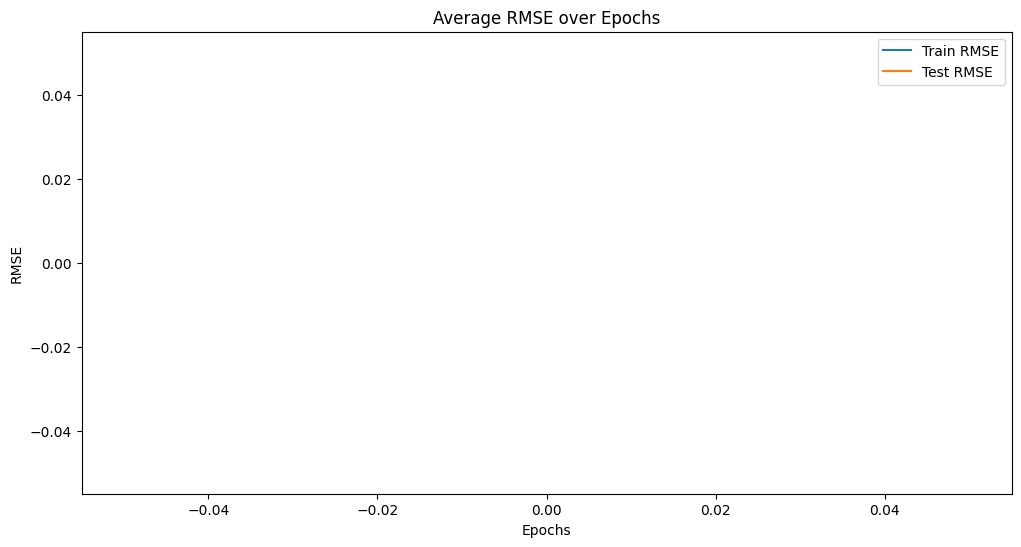

In [132]:
import numpy as np

train_rmse_avg = np.mean(train_rmse_histories, axis=0)
test_rmse_avg = np.mean(test_rmse_histories, axis=0)

print("Train:")
print(np.mean(train_rmse_histories))
print("Test:")
print(np.mean(test_rmse_histories))


plt.figure(figsize=(12, 6))
plt.plot(train_rmse_avg, label='Train RMSE')
plt.plot(test_rmse_avg, label='Test RMSE')
plt.title('Average RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()


In [133]:
from matplotlib import pyplot as plt
for i, (train_mse, test_mse) in enumerate(zip(train_mse_histories, test_mse_histories), start=1):
    plt.figure(figsize=(12,6))
    plt.plot(train_mse, label='Train MSE')
    plt.plot(test_mse, label='Test MSE')
    plt.title(f'MSE over Epochs for fold {i}')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()